In [259]:
import requests
import pandas as pd
import lxml.etree as ET
from bs4 import BeautifulSoup as soup
import unicodedata
import os
import string
from collections import Counter
import re

In [260]:
df = pd.read_hdf("pdf_texts.h5", key="df_texts")
df

filename                                               text
0  1286398150.pdf    Evangelische Hochschule für angewandte Wisse...
1  131701071X.pdf  Aus der  Neurologischen Universitäts klinik  d...
2  1318286735.pdf    Aus der Klinik und Poliklinik für Anästhesio...
3  1318745853.pdf  Aus der Fakultät für Medizin  der Universität ...
4  1319384919.pdf   Aus der Klinik und Poliklinik für Palliativme...
5  1320566618.pdf  
STUDIERENDE IMFOKUS BACK ON CAMPUS NACH DER P...
6  1321172656.pdf     Erstes Working Paper zum Forschungsprojekt ...
7  1322316449.pdf  AemaetWissenschaftliche Zeitschrift für Philos...
8  1322578931.pdf        Mediale Darstellung arbeitsweltlicher Ve...
9  1323400958.pdf   I  FÖRDERUNG DER ORGANISATIONALEN RESILIENZ T...

### Suche nach bestimmten Wörtern im gesamten Text:

In [261]:
searchterm = "Corona"

In [262]:
for index, row in df.iterrows():
    if searchterm in row['text']:
        filename = row['filename']
        print(f"Das Suchwort wurde in Datei {filename} gefunden.")
    else:
        print(f"Keine Treffer in Datei {filename}.")

Das Suchwort wurde in Datei 1286398150.pdf gefunden.
Das Suchwort wurde in Datei 131701071X.pdf gefunden.
Das Suchwort wurde in Datei 1318286735.pdf gefunden.
Das Suchwort wurde in Datei 1318745853.pdf gefunden.
Das Suchwort wurde in Datei 1319384919.pdf gefunden.
Das Suchwort wurde in Datei 1320566618.pdf gefunden.
Das Suchwort wurde in Datei 1321172656.pdf gefunden.
Das Suchwort wurde in Datei 1322316449.pdf gefunden.
Das Suchwort wurde in Datei 1322578931.pdf gefunden.
Das Suchwort wurde in Datei 1323400958.pdf gefunden.


### Suche nach bestimmtem Wort im gesamten Text mit Häufigkeit: 

In [263]:
for index, row in df.iterrows():
    count = row['text'].count(searchterm)
    filename = row['filename']
    if count > 0:
        print(f"Das Suchwort wurde in Datei {filename} {count}-mal gefunden.")
    else:
        print(f"Keine Treffer in Datei {filename}.")

Das Suchwort wurde in Datei 1286398150.pdf 64-mal gefunden.
Das Suchwort wurde in Datei 131701071X.pdf 33-mal gefunden.
Das Suchwort wurde in Datei 1318286735.pdf 19-mal gefunden.
Das Suchwort wurde in Datei 1318745853.pdf 51-mal gefunden.
Das Suchwort wurde in Datei 1319384919.pdf 41-mal gefunden.
Das Suchwort wurde in Datei 1320566618.pdf 2-mal gefunden.
Das Suchwort wurde in Datei 1321172656.pdf 28-mal gefunden.
Das Suchwort wurde in Datei 1322316449.pdf 11-mal gefunden.
Das Suchwort wurde in Datei 1322578931.pdf 96-mal gefunden.
Das Suchwort wurde in Datei 1323400958.pdf 19-mal gefunden.


### Zusammenführen aller Volltexte für Häufigkeitsanalyse: 

In [270]:
fulltext = ' '.join(df['text'])
#text_list = df['text'].tolist()

In [271]:
print(fulltext)
#print(df.text[0])

  Evangelische Hochschule für angewandte Wissenschaften –  Evangelische Fachhochschule Nürnberg   Bachelor of Science: Angewandte Pflegewissenschaften    Bachelorarbeit  Ad-Hoc Teambildung in der Pflege und die Auswirkungen auf die pflegerische Versorgung im Akutsetting bezogen auf die Corona Pandemie - Ad-hoc team building in nursing and the impacts  on Nursing care in acute settings related to the corona pandemic     Katja Kaske      Gutachterin: Prof. Dr. Susanne Schuster Abgabetermin: 13.01.2023  Zusammenfassung  Hintergrund:  Mit Blick auf die Corona-Pandemie ist gerade im Bereich der Pflege wichtig, welche Auswirkungen diese hatte. Dies betrifft zum einen die Struktur und Bildung von Pfle-geteams unter Einbezug der Einflüsse durch die Führungsebenen. Zum anderen betrifft es auch die Auswirkungen für die pflegerische Versorgung, hier besonders die Pflegequalität und Patientensicherheit. Die Pflegeteams und die Entstehung und Bildung dieser ist entscheidend. Durch die Pandemie wurd

### Entfernen von Satzzeichen:

In [272]:
def clean_strings(text):
    cleanedtext = ""
    for c in string.punctuation:
        text = text.replace(c," ")
        wordlist = str.split(text)
        cleanedtext = ' '.join(wordlist)
    return cleanedtext

In [277]:
alltexts = clean_strings(fulltext)

In [278]:
print(alltexts)

Evangelische Hochschule für angewandte Wissenschaften – Evangelische Fachhochschule Nürnberg Bachelor of Science Angewandte Pflegewissenschaften Bachelorarbeit Ad Hoc Teambildung in der Pflege und die Auswirkungen auf die pflegerische Versorgung im Akutsetting bezogen auf die Corona Pandemie Ad hoc team building in nursing and the impacts on Nursing care in acute settings related to the corona pandemic Katja Kaske Gutachterin Prof Dr Susanne Schuster Abgabetermin 13 01 2023 Zusammenfassung Hintergrund Mit Blick auf die Corona Pandemie ist gerade im Bereich der Pflege wichtig welche Auswirkungen diese hatte Dies betrifft zum einen die Struktur und Bildung von Pfle geteams unter Einbezug der Einflüsse durch die Führungsebenen Zum anderen betrifft es auch die Auswirkungen für die pflegerische Versorgung hier besonders die Pflegequalität und Patientensicherheit Die Pflegeteams und die Entstehung und Bildung dieser ist entscheidend Durch die Pandemie wurden Teams teilweise ad hoc und aufgru

In [279]:
words = re.findall(r'\b\w+\b', fulltext)       
print(words)

['Evangelische', 'Hochschule', 'für', 'angewandte', 'Wissenschaften', 'Evangelische', 'Fachhochschule', 'Nürnberg', 'Bachelor', 'of', 'Science', 'Angewandte', 'Pflegewissenschaften', 'Bachelorarbeit', 'Ad', 'Hoc', 'Teambildung', 'in', 'der', 'Pflege', 'und', 'die', 'Auswirkungen', 'auf', 'die', 'pflegerische', 'Versorgung', 'im', 'Akutsetting', 'bezogen', 'auf', 'die', 'Corona', 'Pandemie', 'Ad', 'hoc', 'team', 'building', 'in', 'nursing', 'and', 'the', 'impacts', 'on', 'Nursing', 'care', 'in', 'acute', 'settings', 'related', 'to', 'the', 'corona', 'pandemic', 'Katja', 'Kaske', 'Gutachterin', 'Prof', 'Dr', 'Susanne', 'Schuster', 'Abgabetermin', '13', '01', '2023', 'Zusammenfassung', 'Hintergrund', 'Mit', 'Blick', 'auf', 'die', 'Corona', 'Pandemie', 'ist', 'gerade', 'im', 'Bereich', 'der', 'Pflege', 'wichtig', 'welche', 'Auswirkungen', 'diese', 'hatte', 'Dies', 'betrifft', 'zum', 'einen', 'die', 'Struktur', 'und', 'Bildung', 'von', 'Pfle', 'geteams', 'unter', 'Einbezug', 'der', 'Einflüs

### Entfernen von Zahlen: 

In [281]:
wordlist = []

for word in words: 
    if word.isdecimal() is True: 
        continue
    else: 
        wordlist.append(word)

In [282]:
print(wordlist)

['Evangelische', 'Hochschule', 'für', 'angewandte', 'Wissenschaften', 'Evangelische', 'Fachhochschule', 'Nürnberg', 'Bachelor', 'of', 'Science', 'Angewandte', 'Pflegewissenschaften', 'Bachelorarbeit', 'Ad', 'Hoc', 'Teambildung', 'in', 'der', 'Pflege', 'und', 'die', 'Auswirkungen', 'auf', 'die', 'pflegerische', 'Versorgung', 'im', 'Akutsetting', 'bezogen', 'auf', 'die', 'Corona', 'Pandemie', 'Ad', 'hoc', 'team', 'building', 'in', 'nursing', 'and', 'the', 'impacts', 'on', 'Nursing', 'care', 'in', 'acute', 'settings', 'related', 'to', 'the', 'corona', 'pandemic', 'Katja', 'Kaske', 'Gutachterin', 'Prof', 'Dr', 'Susanne', 'Schuster', 'Abgabetermin', 'Zusammenfassung', 'Hintergrund', 'Mit', 'Blick', 'auf', 'die', 'Corona', 'Pandemie', 'ist', 'gerade', 'im', 'Bereich', 'der', 'Pflege', 'wichtig', 'welche', 'Auswirkungen', 'diese', 'hatte', 'Dies', 'betrifft', 'zum', 'einen', 'die', 'Struktur', 'und', 'Bildung', 'von', 'Pfle', 'geteams', 'unter', 'Einbezug', 'der', 'Einflüsse', 'durch', 'die',

In [283]:
counts = Counter(wordlist)
print(counts)

Counter({'der': 6297, 'und': 5501, 'die': 5112, 'in': 2680, 'von': 2319, 'zu': 1712, 'sich': 1400, 'Die': 1364, 'den': 1285, 'im': 1196, 'werden': 1171, 'das': 1159, 'auf': 1156, 'eine': 1100, 'ist': 1098, 'des': 1090, 'S': 1042, 'mit': 1019, 'für': 991, 'auch': 977, 'als': 976, 'dass': 895, 'durch': 839, 'nicht': 789, 'wird': 750, 'Home': 732, 'Office': 719, 'ein': 698, 'einer': 696, 'zur': 624, 'Pandemie': 603, 'oder': 592, 'et': 581, 'al': 580, 'sind': 553, 'of': 536, 'an': 535, 'dem': 524, 'aus': 513, 'wurde': 509, 'es': 501, 'n': 490, 'wurden': 484, 'um': 457, 'and': 439, 'nach': 435, 'Arbeit': 416, 'wie': 390, 'COVID': 389, 'bei': 382, 'Der': 370, 'In': 358, 'O': 356, 'the': 351, 'a': 350, 'einen': 347, 'Darstellung': 347, 'kann': 344, 'CoV': 344, 'A': 344, 'Es': 339, 'sowie': 338, 'M': 331, 'während': 309, 'Das': 304, 'zum': 303, 'vor': 301, 'da': 301, 'hier': 289, 'über': 284, 'SARS': 279, 'können': 277, 'J': 274, 'Corona': 272, 'Quarantäne': 270, 'nur': 269, 'sie': 265, 'hat':

### Entfernen von Stopwörtern: 

In [284]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

german_stopwords = stopwords.words('german')
english_stopwords = stopwords.words('english')
all_stopwords = german_stopwords + english_stopwords
#print(all_stopwords)

newStopwords = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
              'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'vgl', '\x97', '•', '■', 'v',
               'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
               'U', 'V', 'W', 'X', 'Y', 'Z', ' A 	', 'In', 'Die', 'Der', 'Das', 'The', 'Es', 'Eine']

all_stopwords.extend(newStopwords)

tokens_without_sw = [word for word in wordlist if not word in all_stopwords]
counts = Counter(tokens_without_sw)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Steffi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [285]:
print(counts)

Counter({'Home': 732, 'Office': 719, 'Pandemie': 603, 'et': 581, 'al': 580, 'wurde': 509, 'wurden': 484, 'Arbeit': 416, 'COVID': 389, 'Darstellung': 347, 'CoV': 344, 'sowie': 338, 'SARS': 279, 'Corona': 272, 'Quarantäne': 270, 'Patienten': 243, 'Individuum': 224, 'Rahmen': 222, 'Kita': 216, 'Ergebnisse': 214, 'Individualisierung': 210, 'Patientinnen': 203, 'de': 198, 'Eltern': 189, 'Mitarbeiter': 186, 'Auch': 183, 'Care': 177, 'Aspekte': 174, 'Versorgung': 172, 'Belastung': 172, 'Auswirkungen': 169, 'Im': 169, 'Daten': 164, 'Sie': 164, 'Studie': 163, 'https': 163, 'mehr': 161, 'en': 160, 'bereits': 158, 'jedoch': 158, 'Diese': 157, 'Ein': 153, 'Kategorien': 151, 'Resilienz': 150, 'aufgrund': 146, 'Angst': 144, 'Tabelle': 143, 'Unternehmen': 141, 'Dies': 139, 'dar': 134, 'ebd': 132, 'Angehörige': 126, 'Auswertung': 123, 'dargestellt': 121, 'www': 119, 'Studien': 118, 'immer': 116, 'care': 115, 'Subjekt': 114, 'somit': 110, 'stellt': 110, 'Durch': 108, 'Bedeutung': 108, 'Palliative': 108

In [286]:
df = pd.DataFrame(counts.most_common(50), columns=['Wort', 'Häufigkeit'])
df

Wort  Häufigkeit
0                 Home         732
1               Office         719
2             Pandemie         603
3                   et         581
4                   al         580
5                wurde         509
6               wurden         484
7               Arbeit         416
8                COVID         389
9          Darstellung         347
10                 CoV         344
11               sowie         338
12                SARS         279
13              Corona         272
14          Quarantäne         270
15           Patienten         243
16          Individuum         224
17              Rahmen         222
18                Kita         216
19          Ergebnisse         214
20  Individualisierung         210
21        Patientinnen         203
22                  de         198
23              Eltern         189
24         Mitarbeiter         186
25                Auch         183
26                Care         177
27             Aspekte         174
28          Versorgung         172
29           Belastung         172
30        Auswirkungen         169
31                  Im         169
32               Daten         164
33                 Sie         164
34              Studie         163
35               https         163
36                mehr         161
37                  en         160
38             bereits         158
39              jedoch         158
40               Diese         157
41                 Ein         153
42          Kategorien         151
43           Resilienz         150
44            aufgrund         146
45               Angst         144
46             Tabelle         143
47         Unternehmen         141
48                Dies         139
49                 dar         134

<Axes: title={'center': 'Worthäufigkeiten'}, xlabel='Wort'>

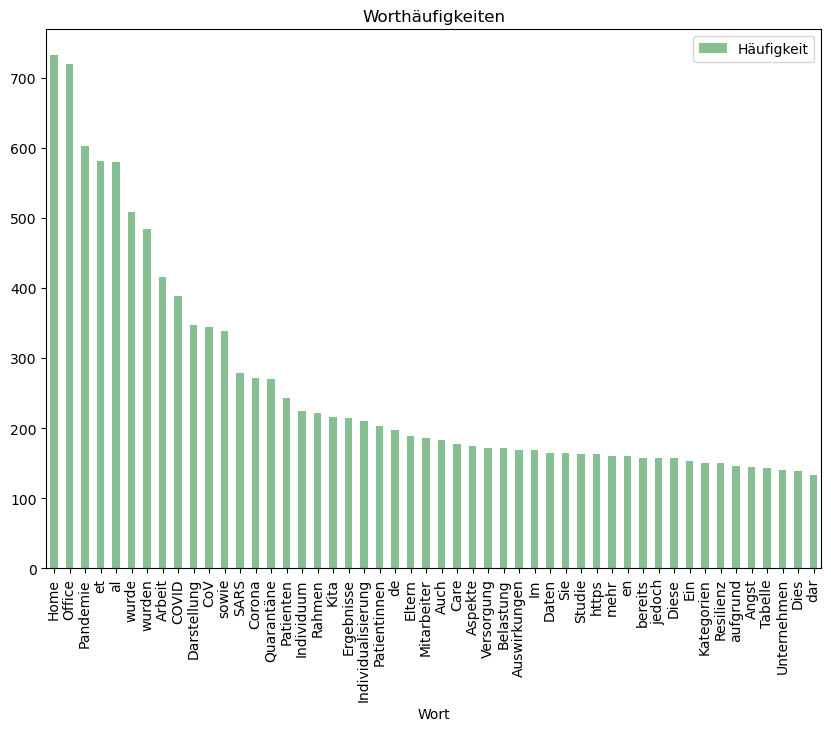

In [287]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot(kind='bar', x=0, y=1, title='Worthäufigkeiten', figsize=(10,7), color='#86bf91')

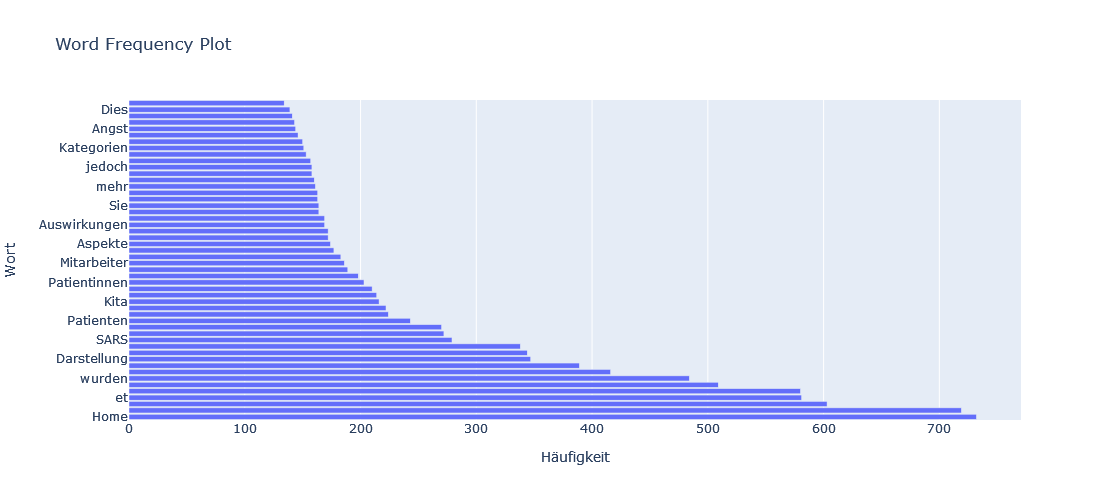

In [288]:
import plotly.express as px

fig = px.bar(df, x='Häufigkeit', y='Wort', title='Word Frequency Plot', height=500)
fig.show()

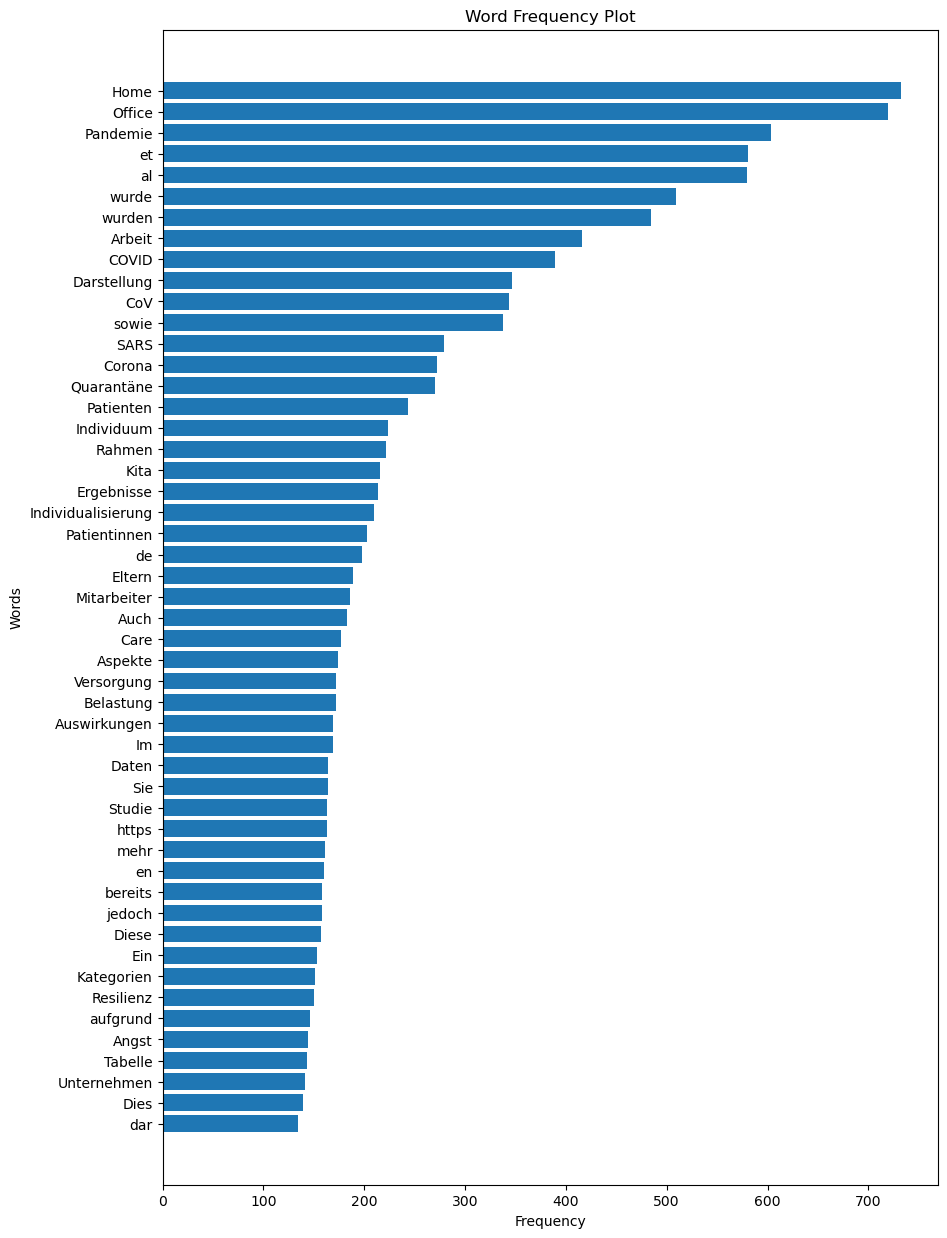

In [289]:
plt.figure(figsize=(10, 15))
plt.barh(df['Wort'], df['Häufigkeit'])
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Word Frequency Plot')
plt.gca().invert_yaxis()
plt.show()